# Part II - (Presentation Title)
## by (Ahmed Mohamed)


## Investigation Overview


> we are mainly investigating two types of variables for one purpose, this purpose is to proof or disproof the relationship and the effect of those variables on the loan status and payment. In the presentation, we individually explored both types of variables, showed an example or two for the exploration from each type, and its plot/graph. So you will find univariate graphs at the begaining.



## Dataset Overview

> The dataset that we are investigating in this notebook today is a collected data along the years for the loans provided by Prosper Marketplace, Peer-to-peer lending company, that is headquartered and originated in San Fransisco, USA. The data contains data and variables (around 81 variables) for more than 113900 different loan for different people, and the variables provided is enough and too much that we can ask and answer many and varias types of question from it. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

## (Visualization 1)

> We found that some of the interst variables that seems to have effect on the loan status and its payment are not actually having this effect or relation ship, one of those variables are the home ownership, Term, and the monthly income that doesn't seem to be aligned when plotting them alone, as we found that almost half of the borrowers owns houses as the follwoing graph is telling:


> **First of all** 
We see from the next plot that we got a more clear overview about the borrowers' income, now we have a better view of where the income range is moving around, and it is moving around being between 1000 USD to 10000 USD in the middle between them is the majority, it is in a bell shape distripution.

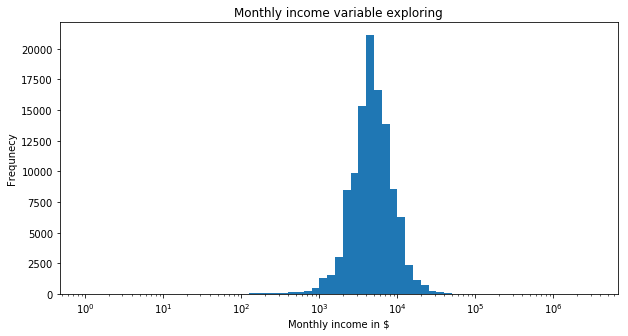

In [3]:
# Logarithmic scale plot
binsize = 1000
bins = np.arange(0, df['StatedMonthlyIncome'].max()+binsize, binsize)
# bins
bins = 10 ** np.arange(0, 6.5+0.1, .1)
ticks = [0, 10, 1000, 10000, 50000, 100000, 1000000]
labels = ["0", '10', "1k", "10k", '50k', "100k", '1m']
plt.figure(figsize=[10, 5])
plt.xscale('log')
plt.title("Monthly income variable exploring")
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
# plt.xticks(ticks, labels)
plt.xlabel('Monthly income in $')
plt.ylabel('Frequnecy')
plt.show()


>We also found that the next plot of borrower's home ownership is unusual, the distrpution of the ***borrowers' monthly income*** (first plot) we discovered was in bell shape, but the home ownership doesn't follow the same trend, which why we should reexplore this variable again in bivariate and multivariate part.

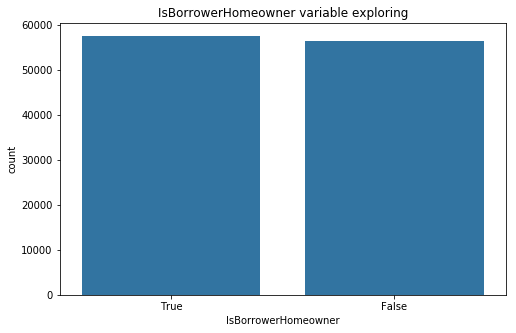

In [4]:
# Bar chart for categorical data
plt.figure(figsize=(8,5))
base_color = sb.color_palette()[0]
# Return the Series having unique values
x = df['IsBorrowerHomeowner'].unique()
# Return the Series having frequency count of each unique value
y = df['IsBorrowerHomeowner'].value_counts(sort=False)
plt.xlabel('Borrower Owns a home')
plt.ylabel('count')
plt.title("IsBorrowerHomeowner variable exploring")
# To order it by the count
freq = df['IsBorrowerHomeowner'].value_counts()
count_order = freq.index
# Plot the figure
sb.countplot(data=df, x='IsBorrowerHomeowner', color=base_color, order=count_order);
plt.show()


## (Visualization 2)

> After that we also relized that some of the variables may have strong relation with the loan status and its payment, and worth further exploring, those where like the income itself which we saw its plot, in addition to the dept to income ratio as the follwoing:

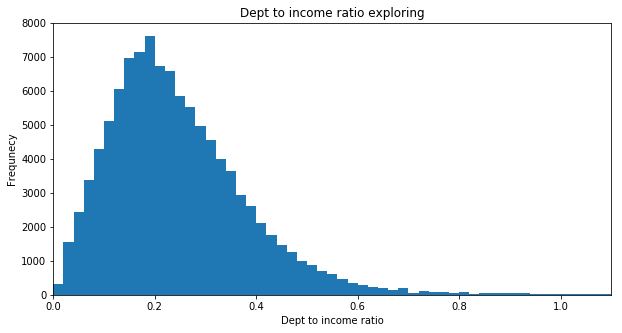

In [5]:
ratio = df['DebtToIncomeRatio'][df['DebtToIncomeRatio'].isnull() != True]
binsize = .02
bins = np.arange(0, ratio.max()+binsize, binsize)
plt.figure(figsize=[10, 5])
plt.hist(ratio, bins = bins)
plt.xlim([0,1.1])
plt.title("Dept to income ratio exploring")
plt.xlabel("Dept to income ratio")
plt.ylabel('Frequnecy')
plt.show()

>We can see that the this graph is making a logical sense and worth further exploring. this also tells us a usual observation, which is the less the income, the more likely your are a borrower from prosper, nothing unusual here **Except** the fact that some poeple with high income are borrowing from prosper which we further investigated.

## (Visualization 3)

> then we started to confirm our theories about the high corellated variables and the low correlated variables by plotting multivariate plots to see the relationships as the following:


> We find in the next plot that home ownership doesn't really have a strong corellation with the loan status, and the high income doesn't have a strong  realation that says they should have a house or the opposite though.

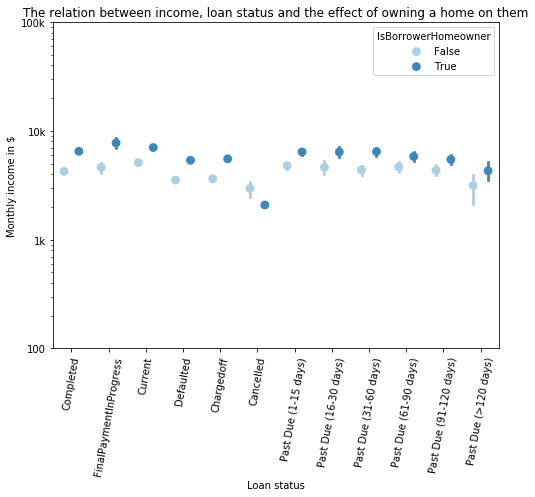

In [6]:
ordered= ['Completed',  'FinalPaymentInProgress', 'Current','Defaulted','Chargedoff','Cancelled', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
        'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)']
def hue_graph(X, Y, Hue, log=True, title=''):
    fig = plt.figure(figsize = [8,6])
    ax = sb.pointplot(data = df, x =X , y = Y, hue = Hue,
               palette = 'Blues', linestyles = '', dodge = 0.4, order=ordered)
    plt.title(title)
    plt.ylabel('Monthly income in $')
    plt.xlabel('Loan status')
    if log == True:
        plt.yscale('log')
    ax.set_yticklabels([],minor = True)
    plt.xticks(rotation=80)
#     plt.xticks(ordered)
    plt.yticks([100, 1000, 10000, 100000], ['100', '1k', '10k', '100k'])
hue_graph('LoanStatus', 'StatedMonthlyIncome', 'IsBorrowerHomeowner', True, 'The relation between income, loan status and the effect of owning a home on them')
plt.show();

> We find in the next plot that high income poeple tend to pay in 12 months, the lowest period, and low income people tend to use the 60 month and 36 options. In addition to that, we see from the lines that the less the period in general, the more the opportunity that the loan will go to different state than the completed state or current state, which is usually a bad state like defaulted or cancelled.  

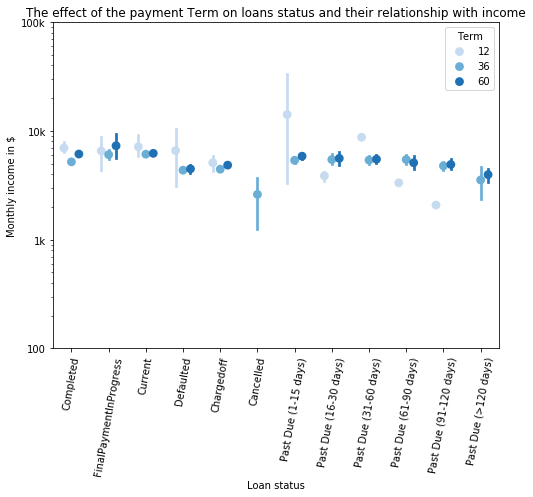

In [7]:
# use of functions
hue_graph('LoanStatus', 'StatedMonthlyIncome', 'Term', True, 'The effect of the payment Term on loans status and their relationship with income')

## Summary 
From that, we found that there are few main charactaristics that can affect / have a relation with / can predict the loan status or its payment or completion, and at the same time there are many variables that maybe logiacally does, actually doesn't. We found that the income is one of the main charactraistics that affect the loan's payment, high income people tend to pay more than low and average income people, beside that the employment status, the person have to be employed in order to be able to make income (in most of the cases). In addition to that we found that the small or less term/number of months provided to pay the dept will mostly cause a payment delay or other problems like cancelling the loan. Home ownership and available bank credit doesn't have any relation to the loan status, otherwise, dept to income ration plays an importnant role that the higher it is, the higher the probability that borrowers will not be able to complete the dept in time at least. Those are the main things we noticed that can predict the loan status and the one that we shouldn't logically consider as well.   

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 417527 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 